In [240]:
import os 
import json 

REDDITOR_FILE = "raw_data/redditor_dict.json"
SUBMISSION_FILE = "raw_data/submission_dict.json"
COMMENT_FILE = "raw_data/comment_dict.json"

def save_get_json(file_name):
    if (os.path.exists(file_name)):
        with open(file_name, 'r') as f:
            return json.load(f)
    return dict()


redditor_dict = save_get_json(REDDITOR_FILE)
submission_dict = save_get_json(SUBMISSION_FILE)
comment_dict = save_get_json(COMMENT_FILE)

In [ ]:
redditor_dict

In [241]:
#16s for O(r+s+c) operation (oof)
from datetime import datetime
CONTROL_DATE = datetime(2023,11,22)
control_group = ['MoosieGoose', 'JollyK9', 'Southern_Ad3032', 'bduwowy272habbw', 'Late_Introduction203', 'kapster68', 'TheApertureMonkey', 'talemoon22', 'sebagolindenwald', 'spicyranchplzz', 'TheFloorMayBeLava_02', 'rxtten_flesh', 'greenblooded395', 'greenblooded395', 'DrakenJosh98', 'WhichUsernameIsBest', 'FStahp2', 'Pongpianskul', 'Kanashimi515', 'eviuwu', 'Kattheloner_22', 'Reeze2911', 'Sac20000', 'RanpoWasTaken', 'jlynny1811', 'Playful-Fail4778', 'GarageOk8109', 'katandcats', 'holyredemption', 'jifpeanutbutter420', 'Timely_Inflation1000', 'Erica_Peanut']



#okay, we need to do feature extraction based on this 
#consider that prof wanted some kind of classification flow over the last 4 months, first stat
#online it was at least 2 weeks but we'll still do 4 months
FIRST_CONSIDER_DATE = datetime(2023, 11-3,22)


In [242]:
!pip install empath

In [243]:
#define input text model (as will be analyzed) here
from empath import Empath

global lexicon

lexicon = Empath()

#negative
lexicon.create_category("angry", ["angry"], model="nytimes")
lexicon.create_category("lonely", ["lonely"], model="nytimes")
lexicon.create_category("sad", ["sad"], model="nytimes")
lexicon.create_category("worried", ["worried"], model="nytimes")
lexicon.create_category("frustrated", ["frustrated"], model="nytimes")
lexicon.create_category("anxious", ["anxious"], model="nytimes")
lexicon.create_category("nervous", ["nervous"], model="nytimes")
lexicon.create_category("disappointed", ["disappointed"], model="nytimes")
lexicon.create_category("gloomy", ["gloomy"], model="nytimes")
lexicon.create_category("miserable", ["miserable"], model="nytimes")
lexicon.create_category("lonely", ["lonely"], model="nytimes")

#positive
lexicon.create_category("happy", ["happy"], model="nytimes")
lexicon.create_category("loved", ["loved"], model="nytimes")
lexicon.create_category("joyful", ["joyful"], model="nytimes")
lexicon.create_category("content", ["content"], model="nytimes")
lexicon.create_category("pleased", ["pleased"], model="nytimes")
lexicon.create_category("grateful", ["grateful"], model="nytimes")
lexicon.create_category("relieved", ["relieved"], model="nytimes")
lexicon.create_category("optimistic", ["optimistic"], model="nytimes")
lexicon.create_category("satisfied", ["satisfied"], model="nytimes")
lexicon.create_category("excited", ["excited"], model="nytimes")
lexicon.create_category("loved", ["loved"], model="nytimes")





["angry", "furious", "frustrated", "frightened", "disgusted", "outraged", "upset", "irritated", "resentful", "annoyed", "embarrassed", "unhappy", "exasperated", "incensed", "indignant", "fearful", "distressed", "scared", "terrified", "enraged", "confused", "afraid", "anxious", "irate", "insulted", "agitated", "distraught", "nervous", "bitter", "bewildered", "impatient", "offended", "shocked", "disgusted", "humiliated", "ashamed", "apprehensive", "puzzled", "incredulous", "perplexed", "tired", "worried", "disgruntled", "mystified", "dispirited", "despondent", "sad", "aghast", "alarmed", "exasperated", "mad", "terrified", "dismayed", "aggrieved", "irritated", "uneasy", "apologetic", "pained", "angered", "uncomfortable", "annoyed", "frightened", "bewildered", "horrified", "dissatisfied", "sorry", "appalled", "disappointed", "insecure", "defiant", "jealous", "relieved", "shocked", "bullied", "abusive", "intimidated", "disturbed", "suspicious", "complaining", "embittered", "elated", "angrie

In [244]:
def get_data_from_txt(txt:str):
    global lexicon

    if (not len(txt)):
        return {k: 0 for k in["angry","sad","worried",
       "frustrated","anxious",
        "nervous","disappointed",
      "gloomy","miserable","longly",
       "happy", "loved", "joyful",
        "content", "pleased",
      "grateful", "relieved",
      "optimistic", "satisfied",
        "excited"]}

    unnormalized = lexicon.analyze(txt, categories=["angry","sad","worried",
       "frustrated","anxious",
        "nervous","disappointed",
      "gloomy","miserable","longly",
       "happy", "loved", "joyful",
        "content", "pleased",
      "grateful", "relieved",
      "optimistic", "satisfied",
        "excited"],normalize = False)
  
    normalized = lexicon.analyze(txt, categories=["angry","sad","worried",
       "frustrated","anxious",
        "nervous","disappointed",
      "gloomy","miserable","longly",
       "happy", "loved", "joyful",
        "content", "pleased",
      "grateful", "relieved",
      "optimistic", "satisfied",
        "excited"],normalize = True)
    

    #we want to make these average to 0 
    summed = 0
    for v in normalized.values(): summed += v 
    to_add = -summed/len(normalized)

    for k in normalized.keys():
        normalized[k] += to_add
    
    return normalized

global txt_keys
txt_keys = ["angry","sad","worried",
       "frustrated","anxious",
        "nervous","disappointed",
      "gloomy","miserable","longly",
       "happy", "loved", "joyful",
        "content", "pleased",
      "grateful", "relieved",
      "optimistic", "satisfied",
        "excited"]

global submission_keys_order
submission_keys_order = [
        # "distinguished" ,
        "is_original_content" ,
        "over_18" ,
        "score" ,
        "title",
        "upvote_ratio" ]

global comment_key_order
comment_key_order =  [
      "is_edited",
      "num_replies", 
      "score",
      "score_is_hidden",
      "total_awards",
      "num_ups",
      "num_downs",
      "body",
      "is_submitter", 
      "stickied"
]

In [245]:
import numpy as np
import time
# import binary_search

class Redditor:

    comment_keys = []
    sub_data_keys = []

    def __init__(self, redditor_dict, comment_dict, submission_dict, redditor_name, start_date, control_date):
        """im lazy rn so first one passed in must have at least some comments"""
        global txt_keys
        global submission_keys_order
        global comment_key_order

        self.all_data = None
        self.all_data_keys = None
        #yield stats related to this
        redditor =  redditor_dict[redditor_name] 
        base_redditor_data = redditor["data"]
        if (not base_redditor_data["has_subreddit"]):
            #set values to -1
            base_redditor_data["over_18"] = -1#redditor.subreddit["over_18"]
            base_redditor_data["num_subscribers"] = -1#redditor.subreddit["subscribers"]

            #this is the only one added that rlly shouldn't be
            base_redditor_data["public_description"] = ""

        
        description_data = get_data_from_txt(base_redditor_data["public_description"])

        # base_data = np.array([v for k,v in base_redditor_data.items() if not isinstance(v, type(""))] +[description_data[i] for i in txt_keys], dtype='float')
        
        base_data = [v for k,v in base_redditor_data.items() if not isinstance(v, type(""))] +[description_data[i] for i in txt_keys]
        base_data_keys = [k for k, v in base_redditor_data.items() if not isinstance(v, type(""))] + [f'public_description_{i}' for i in txt_keys]

        #get sequential data for comments
        sequential_redditor_data = redditor["comments"]

        

        k_segs = 2
        segments = [start_date + (1+i)*(control_date-start_date)/k_segs for i in range(k_segs)]
        cnts = [0 for _ in range(k_segs)]
        suicide_cnts = [0 for _ in range(k_segs)]
        segment_data = [np.zeros((53,),dtype='float') for _ in range(k_segs)]
        comment_keys = [] #None, just setting each time even tho inefficient
        sub_data_keys = []
        current_seg_idx = 0 

        try:
            sequential_redditor_data.sort()
        except:
            print("sequential data is ", sequential_redditor_data) #okay they have the exact same time which is why there are problems bc its not letting me sort bc dict not comparable
            return #TODO - I actually need to correct this one - this doesn't enforce types we wanted to 

        # for i in range(len(sequential_redditor_data) -1 ):
        #     if (i == 0):print(sequential_redditor_data[i][0])
        #     print(sequential_redditor_data[i+1][0] )
        #     assert(sequential_redditor_data[i][0] <= sequential_redditor_data[i+1][0])

        #we need to make sure we have data covering for all this time NOTE must add this
        is_valid = sequential_redditor_data[-1][0] < start_date if len(sequential_redditor_data) else True

        for comment_date, comment_data in sequential_redditor_data:

            #can do binary search for efficiency in future - TODO
            if (comment_date > control_date):
                break 
            if (comment_date < start_date): continue 

            sub_id = comment_data["submission_id"] 
            comment_key = sub_id + "--------" + comment_data["comment_id"]
            try:
                comment_data_dict = comment_dict[comment_key]["data"]
            except:
                return

            #getting comment data 
            comment_body_data = get_data_from_txt(comment_data_dict["body"])
            comment_data = [comment_data_dict[k] for k in comment_key_order]

            if (not len(Redditor.comment_keys)): Redditor.comment_keys = [comment_key_order[i] for i in range(len(comment_key_order)) if not isinstance(comment_data[i], type(""))] + [f'comment_body_{t}' for t in txt_keys]
            
            comment_data = [v for v in comment_data if not isinstance(v, type(""))] + [comment_body_data[i] for i in txt_keys]

            #getting submission data 
            try:
                sub_data_dict = submission_dict[sub_id]
            except:
                return
            sub_data = [sub_data_dict[k] for k in submission_keys_order]

            #TODO - make lookup to avoid repeated computation
            sub_title_data = get_data_from_txt(sub_data_dict["title"])

            if (not len(Redditor.sub_data_keys)): Redditor.sub_data_keys = [submission_keys_order[i] for i in range(len(submission_keys_order)) if not isinstance(sub_data[i], type(""))] + [f'submission_title_{t}' for t in txt_keys]
            sub_data = [v for v in sub_data if not isinstance(v, type(""))] + [sub_title_data[i] for i in txt_keys]  
            #we have a valid comment date 


            #aggregate
            all_time_info = np.array(comment_data + sub_data, dtype='float')

            while (segments[current_seg_idx] < comment_date):
                current_seg_idx += 1
            
            cnts[current_seg_idx] += 1

            segment_data[current_seg_idx] += all_time_info

            if (any(kw in sub_data_dict["title"] for kw in ["suicide", "depress"]) or any(kw in comment_data_dict["body"] for kw in ["suicide", "depress"])):
                suicide_cnts[current_seg_idx] += 1


        segment_keys = Redditor.comment_keys + Redditor.sub_data_keys 

        all_data = base_data*5
        all_data_keys = base_data_keys * 5
        assert len(all_data) == len(all_data_keys), "(0) all_data is of len " + str(len(all_data)) + " all data keys is of len " + str(len(all_data_keys))
        assert len(segment_keys) == len(segment_data[0].tolist()), "segment keys is len " + str(len(segment_keys)) + " while segment_data is len " +  str(len(segment_data[0].tolist()))
        segment_data = [segment_data[i]/max(1,cnts[i]) for i in range(k_segs)]
        for i in range(k_segs):
            all_data += segment_data[i].tolist()
            all_data_keys += [f'seg_{i}_{key_name}' for key_name in segment_keys]

        for i in range(5): 
            all_data.append(is_valid)
            all_data_keys.append("is_valid")
        for i in range(5): 
            all_data += cnts
            all_data_keys += [f'num_comments_in_seg_{i}' for i in range(len(cnts))]
        for i in range(10):
            all_data += suicide_cnts
            all_data_keys += [f'num_suicide_mentions_{i}' for i in range(len(suicide_cnts))]

        assert len(all_data) == len(all_data_keys), "all_data is of len " + str(len(all_data)) + " all data keys is of len " + str(len(all_data_keys))
        self.all_data_keys = all_data_keys
        self.all_data = np.array(all_data, dtype='float')
            #add it to the correct one 


        #okay time to get sequential data
        


    def get_data(self):
        return self.all_data
Redditor(redditor_dict, comment_dict, submission_dict, control_group[0], int(time.mktime(FIRST_CONSIDER_DATE.timetuple())), int(time.mktime(CONTROL_DATE.timetuple())) )
# redditor_dict = save_get_json(REDDITOR_FILE)
# submission_dict = save_get_json(SUBMISSION_FILE)
# comment_dict = save_get_json(COMMENT_FILE)

In [246]:
query_redditors = np.array([Redditor(redditor_dict, comment_dict, submission_dict, c, int(time.mktime(FIRST_CONSIDER_DATE.timetuple())), int(time.mktime(CONTROL_DATE.timetuple())) ).get_data() for c in control_group])

In [247]:
from tqdm import tqdm
treat_keys  = [t for t in redditor_dict.keys() if not t in control_group]
treat_redditors = list()
#TODO - parallelize? also w/ requests after is KD tree is threat safe
for t in tqdm(treat_keys):
    # t = treat_keys[t_idx]
    treat_redditors.append(Redditor(redditor_dict, comment_dict, submission_dict, t, int(time.mktime(FIRST_CONSIDER_DATE.timetuple())), int(time.mktime(CONTROL_DATE.timetuple()))))
    # treat_redditors = [Redditor(redditor_dict, comment_dict, submission_dict, t, int(time.mktime(FIRST_CONSIDER_DATE.timetuple())), int(time.mktime(CONTROL_DATE.timetuple())) ) for t in redditor_dict.keys() if not t in control_group]

# treat_redditors = [t for t in treat_redditors if t.all_data]

  0%|          | 0/12499 [00:00<?, ?it/s]

  5%|▍         | 594/12499 [00:29<16:58, 11.68it/s]

sequential data is  [[1701464078, {'subreddit_id': 't5_2s30g', 'submission_id': '188m65r', 'comment_id': 'kbliupi'}], [1701464077, {'subreddit_id': 't5_2vfcm', 'submission_id': '188m663', 'comment_id': 'kbliuoh'}], [1701464077, {'subreddit_id': 't5_8pn3m2', 'submission_id': '188m65w', 'comment_id': 'kbliumv'}], [1701464077, {'subreddit_id': 't5_h4uwp', 'submission_id': '188m65k', 'comment_id': 'kbliumc'}], [1701464077, {'subreddit_id': 't5_34jka', 'submission_id': '188m64j', 'comment_id': 'kblium2'}], [1701464077, {'subreddit_id': 't5_2vgi4', 'submission_id': '188m65n', 'comment_id': 'kbliulv'}], [1701464077, {'subreddit_id': 't5_5t8ubq', 'submission_id': '188m65o', 'comment_id': 'kbliulx'}], [1701464077, {'subreddit_id': 't5_8pn3m2', 'submission_id': '188m65q', 'comment_id': 'kbliulg'}], [1701464077, {'subreddit_id': 't5_2rpd0', 'submission_id': '188m651', 'comment_id': 'kbliul1'}], [1701464076, {'subreddit_id': 't5_8pn3m2', 'submission_id': '188m65h', 'comment_id': 'kbliuk9'}], [1701

  5%|▍         | 598/12499 [00:29<20:47,  9.54it/s]

sequential data is  [[1635148677, {'subreddit_id': 't5_2seh9', 'submission_id': 'qel8rv', 'comment_id': 'hhyng5p'}], [1635148629, {'subreddit_id': 't5_2s30g', 'submission_id': 'qeudzb', 'comment_id': 'hhyne8w'}], [1635148621, {'subreddit_id': 't5_2ymzc', 'submission_id': 'qfafk3', 'comment_id': 'hhyndwp'}], [1635148519, {'subreddit_id': 't5_2ubgg', 'submission_id': 'qexz8g', 'comment_id': 'hhyn9wq'}], [1635148003, {'subreddit_id': 't5_11isbz', 'submission_id': 'qf12j6', 'comment_id': 'hhymonw'}], [1635147876, {'subreddit_id': 't5_3buf1', 'submission_id': 'qf79sc', 'comment_id': 'hhymjgc'}], [1635147820, {'subreddit_id': 't5_26lae1', 'submission_id': 'qeqcde', 'comment_id': 'hhymh4j'}], [1635147710, {'subreddit_id': 't5_2s4cy', 'submission_id': 'qf68vo', 'comment_id': 'hhymcf9'}], [1635147684, {'subreddit_id': 't5_53zemd', 'submission_id': 'pyk3os', 'comment_id': 'hhymbad'}], [1635147668, {'subreddit_id': 't5_2yk91', 'submission_id': 'qezcl4', 'comment_id': 'hhymajr'}], [1635147656, {'s

 31%|███       | 3876/12499 [8:58:11<54:13,  2.65it/s]       

sequential data is  [[1679520756, {'subreddit_id': 't5_2ssp7', 'submission_id': '11yblpn', 'comment_id': 'jd9uy20'}], [1674784672, {'subreddit_id': 't5_2yo6b', 'submission_id': '10lug0j', 'comment_id': 'j61nwnk'}], [1674784603, {'subreddit_id': 't5_39ne7', 'submission_id': '10m05l5', 'comment_id': 'j61nr5t'}], [1674784398, {'subreddit_id': 't5_39ne7', 'submission_id': '10jzuts', 'comment_id': 'j61nask'}], [1673985200, {'subreddit_id': 't5_2ssp7', 'submission_id': '10dxmif', 'comment_id': 'j4rlt8n'}], [1673321029, {'subreddit_id': 't5_msyp9', 'submission_id': '107wsln', 'comment_id': 'j3pbu28'}], [1672939447, {'subreddit_id': 't5_39ne7', 'submission_id': '103wu4v', 'comment_id': 'j32ok91'}], [1672936001, {'subreddit_id': 't5_swxxz', 'submission_id': '103ymoh', 'comment_id': 'j32f4hm'}], [1672886413, {'subreddit_id': 't5_39em5', 'submission_id': '103ctml', 'comment_id': 'j2zyj1c'}], [1672859586, {'subreddit_id': 't5_2ssp7', 'submission_id': '103494k', 'comment_id': 'j2y15m1'}], [16728516

 31%|███       | 3899/12499 [8:58:12<11:41, 12.26it/s]

sequential data is  [[1592773467, {'subreddit_id': 't5_swm44', 'submission_id': 'frqfg3', 'comment_id': 'fvknflh'}], [1592772688, {'subreddit_id': 't5_2xhvq', 'submission_id': 'hd72ld', 'comment_id': 'fvkm111'}], [1592767354, {'subreddit_id': 't5_2xhvq', 'submission_id': 'hd72ld', 'comment_id': 'fvkcbgu'}], [1592767354, {'subreddit_id': 't5_2xhvq', 'submission_id': 'hd72ld', 'comment_id': 'fvkcbgq'}], [1592762213, {'subreddit_id': 't5_2xhvq', 'submission_id': 'hd72ld', 'comment_id': 'fvk2qz7'}], [1592761310, {'subreddit_id': 't5_3jj03', 'submission_id': 'hd3tak', 'comment_id': 'fvk135f'}], [1592700798, {'subreddit_id': 't5_m0bnr', 'submission_id': 'hcrfr4', 'comment_id': 'fvhs67i'}], [1592680782, {'subreddit_id': 't5_2sdqx', 'submission_id': 'hcp9q0', 'comment_id': 'fvgtaug'}], [1592618128, {'subreddit_id': 't5_2uao3', 'submission_id': 'hcb0rn', 'comment_id': 'fvef1cd'}], [1592343849, {'subreddit_id': 't5_3079s', 'submission_id': 'h9x0pa', 'comment_id': 'fv24gdj'}], [1592323454, {'subr

 54%|█████▍    | 6801/12499 [9:00:10<06:03, 15.67it/s]

sequential data is  [[1514783713, {'subreddit_id': 't5_2qiel', 'submission_id': '7mwmd9', 'comment_id': 'ds0zj3e'}], [1514619948, {'subreddit_id': 't5_35fmc', 'submission_id': '7mn35n', 'comment_id': 'dry2kgn'}], [1514614038, {'subreddit_id': 't5_2qiel', 'submission_id': '7mwmd9', 'comment_id': 'drxzplm'}], [1514491261, {'subreddit_id': 't5_2qh1u', 'submission_id': '7mkqmx', 'comment_id': 'drvjquy'}], [1513752458, {'subreddit_id': 't5_2t2gv', 'submission_id': '7kk7gs', 'comment_id': 'driegdf'}], [1513053891, {'subreddit_id': 't5_2tgev', 'submission_id': '7h14rg', 'comment_id': 'dr4en9w'}], [1512630321, {'subreddit_id': 't5_2cneq', 'submission_id': '7i4f36', 'comment_id': 'dqw3op6'}], [1511331884, {'subreddit_id': 't5_2qh68', 'submission_id': '7eebzm', 'comment_id': 'dq6h1a8'}], [1511246172, {'subreddit_id': 't5_2qh68', 'submission_id': '7eebzm', 'comment_id': 'dq4pmd4'}], [1511114959, {'subreddit_id': 't5_2qh68', 'submission_id': '7dyrv5', 'comment_id': 'dq1vzlz'}], [1510772010, {'subr

 58%|█████▊    | 7289/12499 [9:00:30<03:02, 28.61it/s]

sequential data is  [[1701867795, {'subreddit_id': 't5_9fpi8f', 'submission_id': '18bymly', 'comment_id': 'kc7zvmv'}], [1701862456, {'subreddit_id': 't5_2qjpg', 'submission_id': '18bzc8e', 'comment_id': 'kc7r5d5'}], [1701862245, {'subreddit_id': 't5_2s8z6', 'submission_id': '18c1e6x', 'comment_id': 'kc7quu3'}], [1701836685, {'subreddit_id': 't5_2qhjv', 'submission_id': '18bt79f', 'comment_id': 'kc6rsks'}], [1701830552, {'subreddit_id': 't5_2qhjv', 'submission_id': '18bt79f', 'comment_id': 'kc6egko'}], [1701824229, {'subreddit_id': 't5_2qh44', 'submission_id': '18b62bv', 'comment_id': 'kc6061m'}], [1701822228, {'subreddit_id': 't5_2qh44', 'submission_id': '18b62bv', 'comment_id': 'kc5vmd8'}], [1701821961, {'subreddit_id': 't5_2qh44', 'submission_id': '18b62bv', 'comment_id': 'kc5v0ok'}], [1701810158, {'subreddit_id': 't5_2qh44', 'submission_id': '18b62bv', 'comment_id': 'kc525si'}], [1701810012, {'subreddit_id': 't5_2qh44', 'submission_id': '18b62bv', 'comment_id': 'kc51qyu'}], [1701802

 75%|███████▍  | 9342/12499 [9:01:53<01:41, 31.07it/s]

sequential data is  [[1701911553, {'subreddit_id': 't5_2xhvq', 'submission_id': '18cjda0', 'comment_id': 'kcb299w'}], [1701911520, {'subreddit_id': 't5_2xhvq', 'submission_id': '18cjhjw', 'comment_id': 'kcb26kt'}], [1701909868, {'subreddit_id': 't5_2xhvq', 'submission_id': '18cihbe', 'comment_id': 'kcayd5r'}], [1701909594, {'subreddit_id': 't5_2xhvq', 'submission_id': '18cirlc', 'comment_id': 'kcaxqnl'}], [1701909555, {'subreddit_id': 't5_2xhvq', 'submission_id': '18cismf', 'comment_id': 'kcaxnjd'}], [1701909422, {'subreddit_id': 't5_2xhvq', 'submission_id': '18civ7m', 'comment_id': 'kcaxclh'}], [1701908680, {'subreddit_id': 't5_2xhvq', 'submission_id': '18cik2v', 'comment_id': 'kcavm51'}], [1701908488, {'subreddit_id': 't5_2xhvq', 'submission_id': '18c28ge', 'comment_id': 'kcav5ux'}], [1701908451, {'subreddit_id': 't5_2xhvq', 'submission_id': '18aru17', 'comment_id': 'kcav2q8'}], [1701908420, {'subreddit_id': 't5_2xhvq', 'submission_id': '18c28ge', 'comment_id': 'kcav062'}], [17019083

 79%|███████▉  | 9910/12499 [9:02:14<01:24, 30.77it/s]

sequential data is  [[1701913199, {'subreddit_id': 't5_2qlmm', 'submission_id': '18by8ln', 'comment_id': 'kcb63j1'}], [1701912608, {'subreddit_id': 't5_32q13', 'submission_id': '18bz38g', 'comment_id': 'kcb4pn0'}], [1701912175, {'subreddit_id': 't5_2qlmm', 'submission_id': '18by8ln', 'comment_id': 'kcb3pbf'}], [1701912158, {'subreddit_id': 't5_2qhuq', 'submission_id': '18cbra1', 'comment_id': 'kcb3nwk'}], [1701893342, {'subreddit_id': 't5_2qqt8', 'submission_id': '18bybt3', 'comment_id': 'kc9rqvo'}], [1701893199, {'subreddit_id': 't5_2qqt8', 'submission_id': '18bybt3', 'comment_id': 'kc9rcr3'}], [1701892252, {'subreddit_id': 't5_2qlmm', 'submission_id': '18by8ln', 'comment_id': 'kc9oryu'}], [1701890796, {'subreddit_id': 't5_2qhuq', 'submission_id': '18cbra1', 'comment_id': 'kc9ktsu'}], [1701890780, {'subreddit_id': 't5_2qqt8', 'submission_id': '18bybt3', 'comment_id': 'kc9ks6s'}], [1701890625, {'subreddit_id': 't5_2qlmm', 'submission_id': '18by8ln', 'comment_id': 'kc9kd6v'}], [17018883

100%|██████████| 12499/12499 [9:03:48<00:00,  2.61s/it]


In [248]:
final_treat = list()
final_treat_usernames = list()
# for t in treat_redditors:
for t_index in range(len(treat_redditors)):
    t = treat_redditors[t_index]
    try:
        if (not isinstance(t.all_data, type(None))):
            final_treat.append(t)
            final_treat_usernames.append(treat_keys[t_index])

    except:
        pass

In [249]:
len(treat_redditors)

12499

In [250]:
len(final_treat)

12490

In [251]:
np.array([False, True, False], dtype='float')

array([0., 1., 0.])

In [252]:
import time
print(1696949444)
print(int(time.mktime(CONTROL_DATE.timetuple())))
print(int(time.mktime(CONTROL_DATE.timetuple())) - 1696949444)

1696949444
1700632800
3683356


# Method 1 - KD Tree

In [253]:
#kd tree
#O(k*n*log(n)) construction
#O(q*(log(n)->n)) query 

#search
#O(q*k^2 * n)

#kd
#log(n) < q*k

In [254]:
from sklearn.neighbors import KDTree




In [255]:
data = np.array([t.get_data().tolist() for t in final_treat])
len(data)
data = np.nan_to_num(data)

In [256]:
data[1]

array([ 4.80300000e+03,  1.59238793e+09,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.65400000e+03,
        0.00000000e+00,  0.00000000e+00,  2.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.80300000e+03,  1.59238793e+09,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.65400000e+03,  0.00000000e+00,  0.00000000e+00,
        2.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [257]:
data.shape

(12490, 311)

In [258]:
#okay we need to restructure data and query 
print(data.shape)
epsilon = 1/100000000
mean_data = np.mean(data, axis=0).reshape(1,-1)
std_data = np.std(data, axis=0).reshape(1,-1)

#change to z norm
#X = (X - u)/sigma

#when put to propensity score matching do PCA to do analysis

new_data =(data  - mean_data)/(std_data + epsilon)
new_query_redditors = (query_redditors  - mean_data)/(std_data + epsilon)

(12490, 311)


In [259]:
new_query_redditors.shape

(32, 311)

In [260]:
tree = KDTree(new_data)

In [261]:
dist, matched_indices = tree.query(new_query_redditors, k = 1)

In [262]:
list_of_control = list()
list_of_control_data = list()

all_distances = list()
treat_to_matched_control = dict()
ppl_with_matches = dict()
for dist_idx, treat_idx in enumerate(matched_indices):
    for distance, idx in zip(dist[dist_idx], treat_idx):
        if (distance > 10000):
            break
        print(final_treat_usernames[idx])
        # print(control_group[dist_idx])
        ppl_with_matches[control_group[dist_idx]] = True 

        list_of_control.append(final_treat_usernames[idx])
        list_of_control_data.append(new_data[idx])
        print(distance)
        all_distances.append(distance)
        # ppl_with_matches[control_group]
        # print(new_data[idx].shape)

print("u: ", np.mean(all_distances), "sigma:", np.std(all_distances), "min:", np.min(all_distances), "max:", np.max(all_distances), "median:",np.median(all_distances))
print("ppl without matches r: ", [c for c in control_group if not c in ppl_with_matches])

print("ppl without matches proportion r: ", len([c for c in control_group if not c in ppl_with_matches])/len(control_group))

utroi
2.3773402939468022
Evening-Management-7
0.023493057010194496
kendragibs
0.08500888165503474
throwaway8194122
0.09649155254716366
Intelligent-Risk9885
0.012344288089443054
jojaques
0.005406505202240542
control_burn
28.35614431472876
MetroL7
0.009349557839466399
abcdmetalhead
0.006096841217311063
AdPsychological9510
0.017126532698607862
lola4274
0.19372319467660862
iuanaj
0.032475885146572916
Wide-Bridge-6461
0.005850608395938849
Wide-Bridge-6461
0.005850608395938849
14Boogie
9.055516841789142
ElthonJzohn_997
0.0038796223388737235
Am3l1a____
0.00907027335650474
Oz_a_day
6.892079904987933
OkWrangler1500
1.1453078478190142
prettyp0thead
5.421609328743939
miamihausjunkie
27.242792208901463
ElthonJzohn_997
0.0012409780202776602
Awkward_Reindeer_788
0.007789763933051038
SpendLate5545
0.02518760957580418
ace2212
4.762568821912938
Maggiethedogie
0.04402750169664796
CommunicationDue6753
0.020595906682515257
whale_omelette94
0.026841887730667393
IndependentInternet3
0.02180777387040128
Yeet

In [263]:
vanilla_kd_control = list_of_control

In [264]:
#https://pypi.org/project/psmpy/

# Method 2 - PSA and Propensity

In [265]:
!pip install psmpy

In [266]:
from sklearn.decomposition import PCA

import pandas as pd

# combined_data = new_data + new_query_redditors
combined_data = np.concatenate((new_data, new_query_redditors))
keys =  treat_redditors[0].all_data_keys



In [267]:
combined_data.astype(float)

array([[ 0.08416722, -1.49322515,  0.3173822 , ..., -0.22410057,
        -0.16687426, -0.22410057],
       [-0.31083905,  0.35243391,  0.3173822 , ...,  1.40228878,
        -0.16687426,  1.40228878],
       [-0.15823287, -1.64260384,  0.3173822 , ..., -0.22410057,
        -0.16687426, -0.22410057],
       ...,
       [-0.34866207,  0.01162452,  0.3173822 , ..., -0.22410057,
        -0.16687426, -0.22410057],
       [-0.3331789 ,  0.62040812,  0.3173822 , ..., -0.22410057,
        -0.16687426, -0.22410057],
       [-0.35770186,  0.71634766,  0.3173822 , ..., -0.22410057,
        -0.16687426, -0.22410057]])

In [268]:
control_df = pd.DataFrame(new_data)
control_df.columns = keys
control_df["unique_id"] = np.array([i for i in range(len(final_treat_usernames))],dtype=float) # I know this is misnamed - I need to correct above - I misnamed treat and control
control_df["is_treatment"] = np.array([0 for i in range(len(final_treat_usernames))],dtype=float)

control_df = control_df.loc[:,~control_df.columns.duplicated()]
# treatment_df.head()

treatment_df = pd.DataFrame(new_query_redditors)
treatment_df.columns = keys 
treatment_df["unique_id"] = np.array([len(final_treat_usernames)+1+ i for i in range(len(control_group))],dtype=float)#control_group #again misnamed
#seperate control by treatment - id shuld have one additional space btw
treatment_df["is_treatment"] = np.array([1 for i in range(len(control_group))])

treatment_df = treatment_df.loc[:,~treatment_df.columns.duplicated()]


combined_df = pd.concat((treatment_df, control_df))
# combined_df = combined_df.apply(pd.to_numeric, errors="raise").dropna().astype("float")
# combibed_df = combined_df.apply(lambda col: pd.to_numeric(col, errors='raise'))
combined_df

,comment_karma,time_creation,verified_email,is_employee,is_mod,is_gold,is_suspended,link_karma,num_moderated,num_multireddits,...,seg_1_submission_title_optimistic,seg_1_submission_title_satisfied,seg_1_submission_title_excited,is_valid,num_comments_in_seg_0,num_comments_in_seg_1,num_suicide_mentions_0,num_suicide_mentions_1,unique_id,is_treatment
0,0.051081,-0.045567,0.317382,0.0,-0.409544,-0.108377,0.0,-0.122627,-0.034676,-0.037035,...,0.147421,0.105852,0.480535,-0.372654,-0.534655,2.252068,-0.166874,-0.224101,12491.0,1.0
1,-0.353685,0.609671,0.317382,0.0,-0.409544,-0.108377,0.0,-0.121212,-0.034676,-0.037035,...,0.344794,0.300953,0.049326,2.683453,-0.534655,-0.889759,-0.166874,-0.224101,12492.0,1.0
2,-0.347390,0.587896,-3.150775,0.0,-0.409544,-0.108377,0.0,-0.096302,-0.034676,-0.037035,...,0.344794,0.300953,0.049326,2.683453,-0.534655,-0.889759,-0.166874,-0.224101,12493.0,1.0
3,-0.360849,0.571733,-3.150775,0.0,-0.409544,-0.108377,0.0,-0.124526,-0.034676,-0.037035,...,0.344794,0.300953,0.049326,2.683453,-0.534655,-0.889759,-0.166874,-0.224101,12494.0,1.0
4,-0.361708,0.643656,0.317382,0.0,-0.409544,-0.108377,0.0,-0.129172,-0.034676,-0.037035,...,0.344794,0.300953,0.049326,2.683453,-0.534655,-0.889759,-0.166874,-0.224101,12495.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12485,-0.236157,0.676968,0.317382,0.0,-0.409544,-0.108377,0.0,-0.081635,-0.034676,-0.037035,...,0.344794,0.300953,0.049326,-0.372654,-0.534655,-0.855608,-0.166874,-0.224101,12485.0,0.0
12486,-0.291731,-1.134156,-3.150775,0.0,-0.409544,-0.108377,0.0,-0.114848,-0.034676,-0.037035,...,0.344794,0.300953,0.049326,2.683453,-0.534655,-0.889759,-0.166874,-0.224101,12486.0,0.0
12487,-0.354607,-0.803021,0.317382,0.0,-0.409544,-0.108377,0.0,-0.123637,-0.034676,-0.037035,...,0.344794,0.300953,0.049326,-0.372654,-0.359969,-0.855608,-0.166874,-0.224101,12487.0,0.0
12488,-0.120272,0.447888,0.317382,0.0,2.441740,-0.108377,0.0,7.530469,0.144959,3.153055,...,0.058801,0.018252,-0.138289,-0.372654,0.338775,-0.104302,-0.166874,-0.224101,12488.0,0.0


In [269]:
import pandas as pd
import numpy as np

# Assuming combined_df is your DataFrame
df = combined_df

# Convert non-numeric columns to numeric, coerce non-convertible values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Print columns with non-numeric values
non_numeric_columns = df.apply(lambda x: not pd.api.types.is_numeric_dtype(x))
non_numeric_column_names = non_numeric_columns[non_numeric_columns].index.tolist()
print("Columns with non-numeric values:", non_numeric_column_names)

# Check and assert that all columns are numeric
for x in df.columns:
    assert pd.api.types.is_numeric_dtype(df[x]) , "Only numeric dtypes allowed"

Columns with non-numeric values: []


In [270]:
!pip install --upgrade psmpy

In [271]:
combined_df.shape

(12522, 145)

In [272]:
from psmpy import PsmPy
import pandas.api.types as ptypes
import warnings

psm = PsmPy(combined_df, treatment = "is_treatment", indx="unique_id")

print(psm.treatmentdf.shape)
print(psm.controldf.shape)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    psm.logistic_ps(balance = True)

(32, 144)
(12490, 144)


In [273]:
psm.knn_matched_12n(matcher='propensity_logit', how_many=1)

exclude_column = "unique_id"
matched_ids = psm.matched_ids
matched_ids.set_index("unique_id", inplace = True)
# result_dict = {key: df.loc[key].values.tolist() for key in df.index}

# Create a dictionary where the keys are from the 'unique_id' column and values are arrays of other columns
result_dict = {key: matched_ids.iloc[i, :].values.tolist() for i, key in enumerate(matched_ids.index)}

print(result_dict)


{12491.0: [4605.0], 12492.0: [11673.0], 12493.0: [10187.0], 12494.0: [12015.0], 12495.0: [11104.0], 12496.0: [1073.0], 12497.0: [4887.0], 12498.0: [8674.0], 12499.0: [3135.0], 12500.0: [12059.0], 12501.0: [8995.0], 12502.0: [6441.0], 12503.0: [16.0], 12504.0: [7355.0], 12505.0: [11353.0], 12506.0: [2076.0], 12507.0: [9720.0], 12508.0: [1814.0], 12509.0: [5908.0], 12510.0: [5603.0], 12511.0: [3069.0], 12512.0: [10671.0], 12513.0: [3766.0], 12514.0: [5935.0], 12515.0: [5174.0], 12516.0: [4994.0], 12517.0: [7309.0], 12518.0: [9489.0], 12519.0: [9549.0], 12520.0: [8594.0], 12521.0: [854.0], 12522.0: [9288.0]}


In [274]:
propensity_matched_users = [final_treat_usernames[int(i)] for j in result_dict.values() for i in j]
propensity_score_data = [new_data[int(i)] for j in result_dict.values() for i in j]
print(propensity_matched_users)
print(propensity_score_data)

['Theghostofsabotage', 'ThrowRAcottoncandyy', 'sikubis', 'catiegirl74', 'No_Break_4303', 'MyWhatBigEyesIHave', 'JusticeBeevr', 'ElGranTocho', 'Apuksl', 'Freddybear480', 'Charlie2905', 'FuzzySign278', 'bitteroldbird', 'earlylife_crisis_', 'Notaprumber', 'phuckme2', 'Keiichan_', 'TheSeraphman', 'YearOfTheMoose', 'Alishabrooks29', 'Similar-Lab64', '-doves-nest-', 'outlier37', 'Sudden-Manner-7027', 'SIRDumbDumb', 'Maintenanceman368', '_Dreamy-Rose_', 'aesmith1291', 'partial_birth', 'Tight_Ad_4459', 'NothofagusMacrocarpa', 'Stella2662']
[array([-1.72635075e-01, -1.86672290e+00,  3.17382205e-01,  0.00000000e+00,
        2.44174027e+00, -1.08377322e-01,  0.00000000e+00,  4.18236356e-02,
        5.51417173e-02, -3.70346680e-02,  1.23596758e-01,  1.26551766e-02,
       -5.48796811e-01,  1.26551766e-02,  1.79855405e-02, -2.83103281e-02,
        6.86193585e-02,  2.65044834e-02,  2.44443178e-02,  9.40391722e-03,
        1.96763540e-02,  9.99527830e-02, -8.84948074e-03,  1.01783271e-01,
       -1.2

In [275]:
#match based on PCA of higher size than two
pca = PCA(n_components=66)
pca.fit_transform(combined_data)
print(sum(pca.explained_variance_ratio_), pca.explained_variance_ratio_)

0.931431710720654 [0.11852452 0.06736822 0.05167735 0.04789246 0.03839786 0.03458736
 0.03366009 0.03198507 0.02681449 0.02379073 0.0201644  0.01842393
 0.01765323 0.01726258 0.0171307  0.01663772 0.01638125 0.01621812
 0.01542305 0.01355204 0.01306181 0.01266724 0.01222649 0.01070246
 0.010563   0.01023172 0.0101123  0.01000168 0.0098822  0.00965024
 0.0093455  0.00919578 0.00880224 0.00796268 0.00780958 0.00730577
 0.00722416 0.00690738 0.00647213 0.00633465 0.00616692 0.00593993
 0.00512876 0.00492748 0.0047985  0.00473184 0.00456029 0.00440446
 0.00425184 0.00418379 0.00405037 0.00399066 0.00383273 0.0037235
 0.00365045 0.00354108 0.00339171 0.00330316 0.00318332 0.00307117
 0.00297603 0.00286932 0.00281162 0.00269217 0.00264436 0.00260209]


In [276]:
# pca.transform(new_query_redditors)

In [277]:
#REPEAT ABOVE w/ PCA
new_data_pca = pca.transform(new_data)
query_data_pca = pca.transform(new_query_redditors)

import random
random.seed(55)


"""COPIED FROM ABOVE - SHOULD MAKE INTO FUNCTION"""
control_df = pd.DataFrame(new_data_pca)
# control_df.columns = keys
control_df["unique_id"] = np.array([i for i in range(len(final_treat_usernames))],dtype=float) # I know this is misnamed - I need to correct above - I misnamed treat and control
control_df["is_treatment"] = np.array([0 for i in range(len(final_treat_usernames))],dtype=float)

control_df = control_df.loc[:,~control_df.columns.duplicated()]
# treatment_df.head()

treatment_df = pd.DataFrame(query_data_pca)
# treatment_df.columns = keys 
treatment_df["unique_id"] = np.array([len(final_treat_usernames)+1+ i for i in range(len(control_group))],dtype=float)#control_group #again misnamed
#seperate control by treatment - id shuld have one additional space btw
treatment_df["is_treatment"] = np.array([1 for i in range(len(control_group))])

treatment_df = treatment_df.loc[:,~treatment_df.columns.duplicated()]


combined_df = pd.concat((treatment_df, control_df))

psm2 = PsmPy(combined_df, treatment = "is_treatment", indx="unique_id")

print(psm2.treatmentdf.shape)
print(psm2.controldf.shape)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    psm2.logistic_ps(balance = True)



psm2.knn_matched_12n(matcher='propensity_logit', how_many=1)

exclude_column = "unique_id"
matched_ids = psm2.matched_ids
matched_ids.set_index("unique_id", inplace = True)
# result_dict = {key: df.loc[key].values.tolist() for key in df.index}

# Create a dictionary where the keys are from the 'unique_id' column and values are arrays of other columns
result_dict_pca = {key: matched_ids.iloc[i, :].values.tolist() for i, key in enumerate(matched_ids.index)}

print(result_dict_pca)

propensity_pca_matched_users = [final_treat_usernames[int(i)] for j in result_dict_pca.values() for i in j]
propensity_pca_score_data = [new_data[int(i)] for j in result_dict_pca.values() for i in j]
print(propensity_pca_matched_users)


(32, 67)
(12490, 67)
{12491.0: [1037.0], 12492.0: [10643.0], 12493.0: [3326.0], 12494.0: [8995.0], 12495.0: [230.0], 12496.0: [6970.0], 12497.0: [56.0], 12498.0: [10991.0], 12499.0: [7309.0], 12500.0: [7328.0], 12501.0: [3640.0], 12502.0: [6505.0], 12503.0: [4058.0], 12504.0: [5935.0], 12505.0: [6596.0], 12506.0: [1115.0], 12507.0: [5352.0], 12508.0: [4742.0], 12509.0: [10696.0], 12510.0: [3096.0], 12511.0: [4822.0], 12512.0: [1598.0], 12513.0: [4630.0], 12514.0: [1950.0], 12515.0: [4954.0], 12516.0: [6441.0], 12517.0: [80.0], 12518.0: [4672.0], 12519.0: [10959.0], 12520.0: [9831.0], 12521.0: [10522.0], 12522.0: [290.0]}
['MsNurko', 'Majestic-Fig-524', 'ElthonJzohn_997', 'Charlie2905', 'ResponsibleEnd2058', '4flicka', 'HollowPomegranate', 'EmporioSearcher23', '_Dreamy-Rose_', 'ThinkingInFastFwd', 'Agitated_Metal4063', 'Andromeda_2507', 'hollyelms', 'Sudden-Manner-7027', 'GeneralSab', 'loveForParanormal', 'Tobehonest_00', 'Missing-Cheetah-4285', 'EzeraksGaming', 'aj11scan', 'Dm_me9596',

In [278]:
n_components = 2



combined_pca = PCA(n_components=2)
combined_pca.fit_transform(combined_data)
# combined_pca.fit_transform(new_query_redditors)

treat_pca = PCA(n_components=n_components)
treat_pca.fit_transform(new_query_redditors)
query_components = combined_pca.transform(new_query_redditors)
print("explained variance (treat) if PCA for just them", sum(treat_pca.explained_variance_ratio_), treat_pca.explained_variance_ratio_)


principalComponents = combined_pca.fit_transform(new_data)

pca = PCA(n_components=n_components)
pca.fit_transform(new_data)
print("explained variance (control all)", sum(pca.explained_variance_ratio_), pca.explained_variance_ratio_)


selected_control = combined_pca.transform(list_of_control_data)
trial_pca = PCA(n_components=n_components)
trial_pca.fit_transform(list_of_control_data)
print("explained variance (control KD) if PCA for just them", sum(trial_pca.explained_variance_ratio_), trial_pca.explained_variance_ratio_)

propensity_users = combined_pca.fit_transform(propensity_score_data)
trial_pca.fit_transform(propensity_score_data)
print("explained variance (propensity) if PCA for just them", sum(trial_pca.explained_variance_ratio_), trial_pca.explained_variance_ratio_)

propensity_pca_users = combined_pca.fit_transform(propensity_pca_score_data)
trial_pca.fit_transform(propensity_pca_score_data)
print("explained variance (propensity + PCA before) if PCA for just them", sum(trial_pca.explained_variance_ratio_), trial_pca.explained_variance_ratio_)


explained variance (treat) if PCA for just them 0.7888823700451641 [0.61929238 0.16958999]
explained variance (control all) 0.18568665955514452 [0.11860881 0.06707785]
explained variance (control KD) if PCA for just them 0.8863642908369055 [0.83656626 0.04979803]
explained variance (propensity) if PCA for just them 0.8210922426798829 [0.59485499 0.22623725]
explained variance (propensity + PCA before) if PCA for just them 0.8248502556485117 [0.62986488 0.19498537]


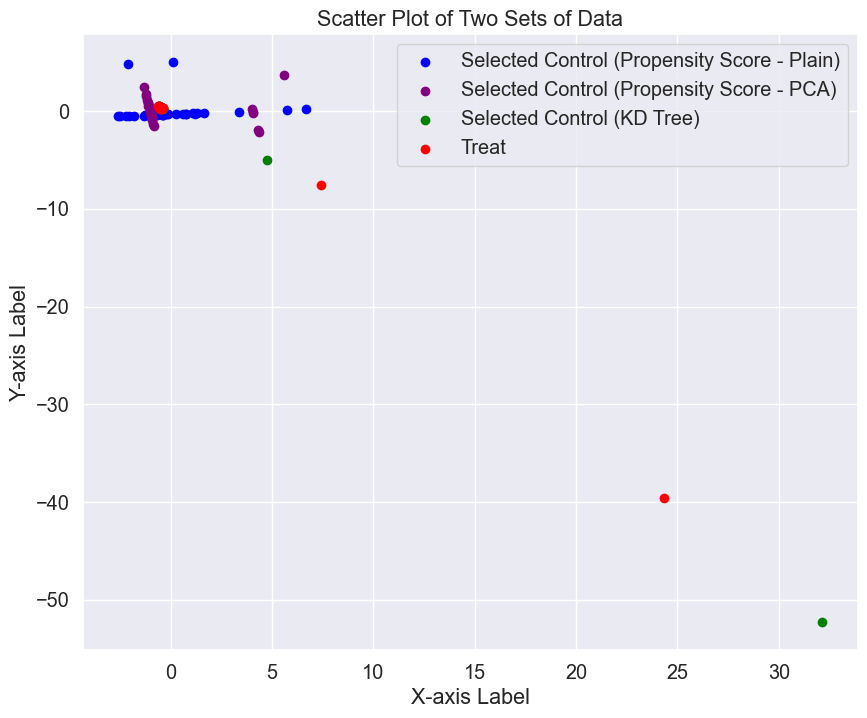

In [279]:
import matplotlib.pyplot as plt

# Extract x and y coordinates from the data
# x1, y1 = zip(*principalComponents)
x2, y2 = zip(*query_components)
x3, y3 = zip(*selected_control)
x4, y4 = zip(*propensity_users)
x5, y5 = zip(*propensity_pca_users)

# Create a scatter plot with different colors for each set
# plt.scatter(x1, y1, color='blue', label='All Other')


plt.scatter(x4, y4, color='blue', label='Selected Control (Propensity Score - Plain)')
plt.scatter(x5, y5, color='purple', label='Selected Control (Propensity Score - PCA)')
plt.scatter(x3, y3, color='green', label='Selected Control (KD Tree)')
plt.scatter(x2, y2, color='red', label='Treat')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of Two Sets of Data')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [280]:
#lets get all our groups of users so we can run on other side

print("pca + propensity:",propensity_pca_matched_users )
print("propensity:",propensity_matched_users )
print("KD:",vanilla_kd_control )

pca + propensity: ['MsNurko', 'Majestic-Fig-524', 'ElthonJzohn_997', 'Charlie2905', 'ResponsibleEnd2058', '4flicka', 'HollowPomegranate', 'EmporioSearcher23', '_Dreamy-Rose_', 'ThinkingInFastFwd', 'Agitated_Metal4063', 'Andromeda_2507', 'hollyelms', 'Sudden-Manner-7027', 'GeneralSab', 'loveForParanormal', 'Tobehonest_00', 'Missing-Cheetah-4285', 'EzeraksGaming', 'aj11scan', 'Dm_me9596', 'fruitsaladqueen', 'SnooSuggestions3477', 'sleepyvibes', 'brokenhippie91', 'FuzzySign278', 'Key-Philosophy-2877', 'catharsisters', 'Beautiful_Yoghurt_8', 'oddone1998', 'No_Surprise_320', 'Fair_Bowler_4913']
propensity: ['Theghostofsabotage', 'ThrowRAcottoncandyy', 'sikubis', 'catiegirl74', 'No_Break_4303', 'MyWhatBigEyesIHave', 'JusticeBeevr', 'ElGranTocho', 'Apuksl', 'Freddybear480', 'Charlie2905', 'FuzzySign278', 'bitteroldbird', 'earlylife_crisis_', 'Notaprumber', 'phuckme2', 'Keiichan_', 'TheSeraphman', 'YearOfTheMoose', 'Alishabrooks29', 'Similar-Lab64', '-doves-nest-', 'outlier37', 'Sudden-Manner-

In [281]:
len(redditor_dict)

12530